In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
data = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv')
data

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


In [4]:
data = data.drop(["reference"], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
dtypes: float64(1), object(9)
memory usage: 313.1+ KB
None


In [5]:
data.dropna(subset=['mileage'],inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 10 to 4005
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3808 non-null   object 
 1   year          3807 non-null   float64
 2   price         3808 non-null   object 
 3   transmission  3808 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1230 non-null   object 
 6   engine size   3743 non-null   object 
 7   mileage2      3791 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
dtypes: float64(1), object(9)
memory usage: 327.2+ KB


In [7]:
data.rename(columns={'engine size':'road_tax'},inplace=True)
data["road_tax"].fillna(data["road_tax"].mode(), inplace=True)
data["road_tax"] = data["road_tax"].replace({'£':''}, regex=True).astype("float")
data["road_tax"].fillna(data["road_tax"].median(),inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 10 to 4005
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3808 non-null   object 
 1   year          3807 non-null   float64
 2   price         3808 non-null   object 
 3   transmission  3808 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1230 non-null   object 
 6   road_tax      3808 non-null   float64
 7   mileage2      3791 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
dtypes: float64(2), object(8)
memory usage: 327.2+ KB


In [9]:
data

,model,year,price,transmission,mileage,fuel type,road_tax,mileage2,fuel type2,engine size2
10,C Class,2013.0,"£9,995",Automatic,"44,900",29,160.0,46.3,Petrol,1.6
11,C Class,2012.0,"£6,995",Automatic,"88,200",34,125.0,58.9,Diesel,2.1
12,C Class,2012.0,"£7,495",Automatic,"115,000",37,145.0,54.3,Diesel,2.1
13,C Class,2011.0,"£8,995",Automatic,"69,250",29,150.0,53.3,Diesel,2.1
14,C Class,2015.0,"£14,995",Automatic,"49,850",31,30.0,62.8,Diesel,2.1
...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,150.0,70.6,Diesel,1.598
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,150.0,64.2,Diesel,2.143
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,20.0,65.7,Diesel,2.143
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,145.0,56.5,Diesel,2.143


In [10]:
data.rename(columns={'mileage2':'miles_per_gallon'}, inplace=True)
data["miles_per_gallon"] = data["miles_per_gallon"].astype("float")
data["miles_per_gallon"].fillna(data["miles_per_gallon"].median(),inplace=True)

In [11]:
data

,model,year,price,transmission,mileage,fuel type,road_tax,miles_per_gallon,fuel type2,engine size2
10,C Class,2013.0,"£9,995",Automatic,"44,900",29,160.0,46.3,Petrol,1.6
11,C Class,2012.0,"£6,995",Automatic,"88,200",34,125.0,58.9,Diesel,2.1
12,C Class,2012.0,"£7,495",Automatic,"115,000",37,145.0,54.3,Diesel,2.1
13,C Class,2011.0,"£8,995",Automatic,"69,250",29,150.0,53.3,Diesel,2.1
14,C Class,2015.0,"£14,995",Automatic,"49,850",31,30.0,62.8,Diesel,2.1
...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,150.0,70.6,Diesel,1.598
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,150.0,64.2,Diesel,2.143
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,20.0,65.7,Diesel,2.143
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,145.0,56.5,Diesel,2.143


In [12]:
data.drop(["fuel type"],axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 10 to 4005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             3808 non-null   object 
 1   year              3807 non-null   float64
 2   price             3808 non-null   object 
 3   transmission      3808 non-null   object 
 4   mileage           3808 non-null   object 
 5   road_tax          3808 non-null   float64
 6   miles_per_gallon  3808 non-null   float64
 7   fuel type2        3808 non-null   object 
 8   engine size2      3808 non-null   object 
dtypes: float64(3), object(6)
memory usage: 297.5+ KB


In [14]:
data.rename(columns={'fuel type2': 'fuel_type'}, inplace=True)
data.rename(columns={'engine size2': 'engine_size'}, inplace=True)

In [15]:
data["engine_size"].value_counts()

engine_size
2          1224
2.1         985
1.5         546
1.6         231
2143        174
3           155
2.143       109
4            78
1991         56
2000         37
2100         28
1.991        25
1950         23
1497         17
1595         13
1.8          11
3982         10
1796          9
6.2           8
3000          7
1598          6
2148          5
1597          5
1600          5
2.14          4
1500          4
1.598         4
2.2           3
2996          3
1800          2
1998          2
2145          2
2685          1
Unknown       1
2597          1
5439          1
2.15          1
3498          1
1.497         1
2987          1
2497          1
2.7           1
4000          1
3606          1
1461          1
0             1
2962          1
2.996         1
6208          1
Name: count, dtype: int64

In [16]:
data = data[data["engine_size"]!="Unknown"]
data["engine_size"] = data["engine_size"].replace({",":""},regex=True)
data["engine_size"] = data["engine_size"].astype("float")

<ipython-input-16-2655ea05313f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["engine_size"] = data["engine_size"].replace({",":""},regex=True)
<ipython-input-16-2655ea05313f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["engine_size"] = data["engine_size"].astype("float")


In [17]:
data

,model,year,price,transmission,mileage,road_tax,miles_per_gallon,fuel_type,engine_size
10,C Class,2013.0,"£9,995",Automatic,"44,900",160.0,46.3,Petrol,1.600
11,C Class,2012.0,"£6,995",Automatic,"88,200",125.0,58.9,Diesel,2.100
12,C Class,2012.0,"£7,495",Automatic,"115,000",145.0,54.3,Diesel,2.100
13,C Class,2011.0,"£8,995",Automatic,"69,250",150.0,53.3,Diesel,2.100
14,C Class,2015.0,"£14,995",Automatic,"49,850",30.0,62.8,Diesel,2.100
...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",150.0,70.6,Diesel,1.598
4002,C Class,2018.0,"£18,500",Automatic,"28,248",150.0,64.2,Diesel,2.143
4003,C Class,2014.0,"£11,900",Manual,"48,055",20.0,65.7,Diesel,2.143
4004,C Class,2014.0,"£11,300",Automatic,"49,865",145.0,56.5,Diesel,2.143


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3807 entries, 10 to 4005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             3807 non-null   object 
 1   year              3806 non-null   float64
 2   price             3807 non-null   object 
 3   transmission      3807 non-null   object 
 4   mileage           3807 non-null   object 
 5   road_tax          3807 non-null   float64
 6   miles_per_gallon  3807 non-null   float64
 7   fuel_type         3807 non-null   object 
 8   engine_size       3807 non-null   float64
dtypes: float64(4), object(5)
memory usage: 297.4+ KB


In [19]:
data.dropna(inplace=True)

<ipython-input-19-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3806 entries, 10 to 4005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             3806 non-null   object 
 1   year              3806 non-null   float64
 2   price             3806 non-null   object 
 3   transmission      3806 non-null   object 
 4   mileage           3806 non-null   object 
 5   road_tax          3806 non-null   float64
 6   miles_per_gallon  3806 non-null   float64
 7   fuel_type         3806 non-null   object 
 8   engine_size       3806 non-null   float64
dtypes: float64(4), object(5)
memory usage: 297.3+ KB


In [21]:
data["price"] = data["price"].replace({"£":"",",":""},regex=True).astype("float")

<ipython-input-21-7e984e1b8c3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = data["price"].replace({"£":"",",":""},regex=True).astype("float")


In [22]:
data = data[data["mileage"] != "Unknown"]
data["mileage"]  = data["mileage"].replace({",":""},regex=True).astype("float")

<ipython-input-22-1010f01d2e37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mileage"]  = data["mileage"].replace({",":""},regex=True).astype("float")


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 10 to 4005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             3803 non-null   object 
 1   year              3803 non-null   float64
 2   price             3803 non-null   float64
 3   transmission      3803 non-null   object 
 4   mileage           3803 non-null   float64
 5   road_tax          3803 non-null   float64
 6   miles_per_gallon  3803 non-null   float64
 7   fuel_type         3803 non-null   object 
 8   engine_size       3803 non-null   float64
dtypes: float64(6), object(3)
memory usage: 297.1+ KB


In [24]:
from sklearn.model_selection import train_test_split

X,Y = data.drop(["price"],axis=1),data["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

## Data Visualization

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'road_tax'}>,
        <Axes: title={'center': 'miles_per_gallon'}>],
       [<Axes: title={'center': 'engine_size'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

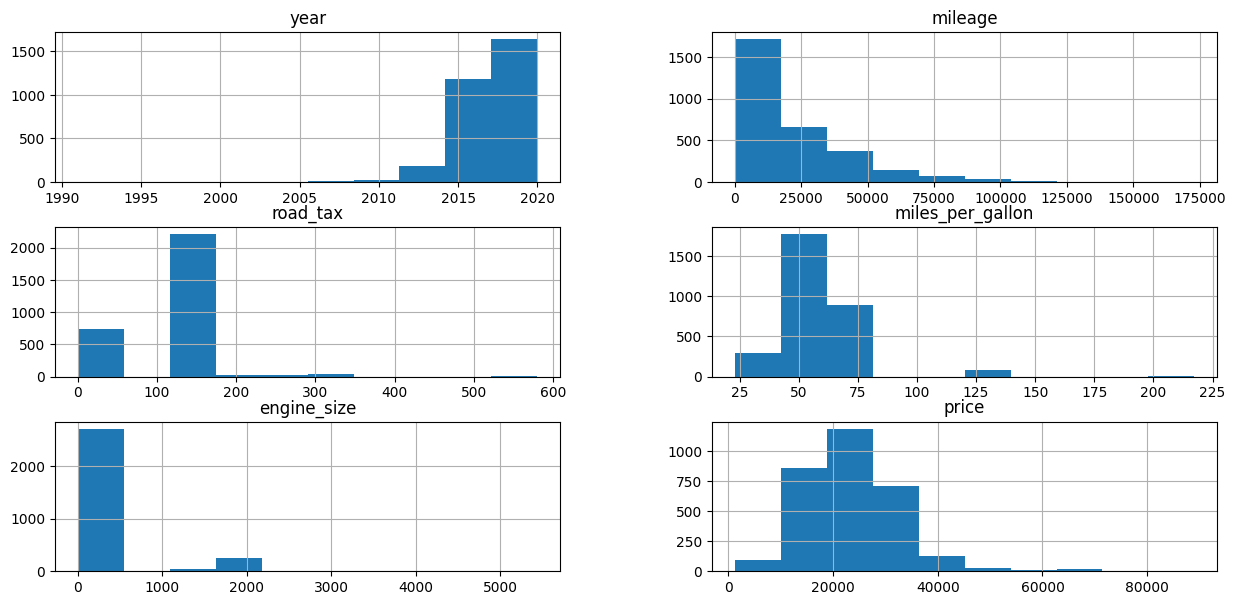

In [25]:
train_data = X_train.join(Y_train)
train_data.hist(figsize=(15,7))

In [26]:
print(data.columns)
numerical_columns = data.select_dtypes(include=["float64","int64"]).columns
numerical_columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'road_tax',
       'miles_per_gallon', 'fuel_type', 'engine_size'],
      dtype='object')


Index(['year', 'price', 'mileage', 'road_tax', 'miles_per_gallon',
       'engine_size'],
      dtype='object')

model, transmission, and fuel_type are excluded

<Axes: >

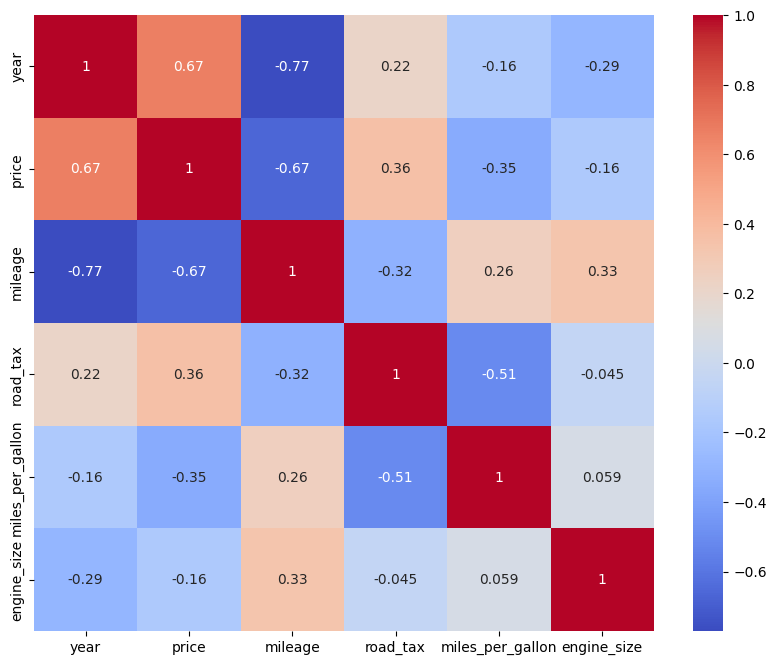

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(train_data[numerical_columns].corr(),annot=True,cmap="coolwarm")

price is fairly correlated with all the features, except engine_size

## Data Preprocessing

In [28]:
train_data

,model,year,transmission,mileage,road_tax,miles_per_gallon,fuel_type,engine_size,price
3641,C Class,2013.0,Manual,57000.0,160.0,52.3,Diesel,2.1,10999.0
1870,C Class,2019.0,Automatic,6224.0,145.0,44.1,Petrol,1.5,24950.0
386,C Class,2016.0,Automatic,44641.0,30.0,64.2,Diesel,2.1,17880.0
1801,C Class,2019.0,Semi-Auto,1200.0,145.0,28.5,Petrol,4.0,66890.0
3629,C Class,2019.0,Automatic,2326.0,145.0,46.3,Petrol,1.5,25590.0
...,...,...,...,...,...,...,...,...,...
3936,C Class,2017.0,Automatic,24265.0,125.0,58.9,Diesel,2100.0,23980.0
2563,C Class,2019.0,Semi-Auto,1000.0,145.0,64.2,Diesel,2.0,32959.0
3003,C Class,2016.0,Automatic,50000.0,30.0,65.7,Diesel,2143.0,19990.0
3897,C Class,2016.0,Automatic,26866.0,20.0,64.2,Diesel,2100.0,17800.0


In [29]:
def preprocess(data):
    data["mileage"] = np.log(data["mileage"]+1)
    data["road_tax"] = np.log(data["road_tax"]+1)
    data["miles_per_gallon"] = np.log(data["mileage"]+1)
    data["engine_size"] = np.log(data["engine_size"]+1)

    data["year"] = data["year"].max() - data["year"]
    data.rename(columns={"year":"age"},inplace=True)
    data["age"] = np.log(data["age"]+1)

In [30]:
preprocess(train_data)

<Axes: >

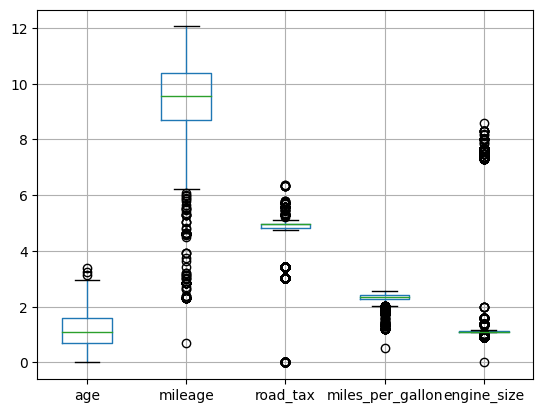

In [31]:
train_data.drop(["price"],axis=1).boxplot()

## Feature Engineering